In [1]:
#一次性导入所有用到的库或函数
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.externals import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,f1_score
from sklearn.linear_model import LogisticRegression  #逻辑回归
from sklearn.neighbors import KNeighborsClassifier  #knn
from sklearn.ensemble import GradientBoostingClassifier #GBDT
from sklearn.neural_network import MLPClassifier  #神经网络
from sklearn.ensemble import RandomForestClassifier #随机森林

In [2]:
#读取数据
df=pd.read_csv("D:\python3.7\HEHE\data.csv",engine="python")
pd.set_option('display.max_rows',4) #为了方便截图，只显示4行。
df

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,0.037789,unstable
9999,6.530527,6.781790,4.349695,8.673138,3.492807,-1.390285,-1.532193,-0.570329,0.073056,0.505441,0.378761,0.942631,0.045263,unstable


In [3]:
np.unique(df[["stabf"]])

array(['stable', 'unstable'], dtype=object)

In [7]:
df.info() #查看数据整体信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
tau1     10000 non-null float64
tau2     10000 non-null float64
tau3     10000 non-null float64
tau4     10000 non-null float64
p1       10000 non-null float64
p2       10000 non-null float64
p3       10000 non-null float64
p4       10000 non-null float64
g1       10000 non-null float64
g2       10000 non-null float64
g3       10000 non-null float64
g4       10000 non-null float64
stab     10000 non-null float64
stabf    10000 non-null object
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


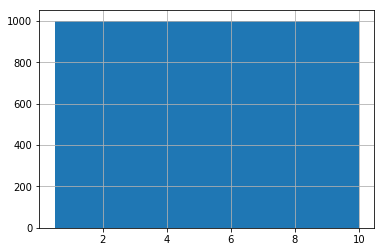

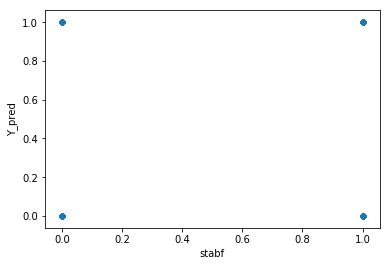

In [19]:
df["stabf"].value_counts()
#df.hist(bins=100,figsize=(20,15))
df["tau1"].hist()
plt.show()

In [4]:
pd.set_option('display.max_rows',60) #将显示的行数改回默认值60
pd.set_option('display.max_columns',10) #为了方便截图，只显示10列
df.describe() #描述性统计

,tau1,tau2,tau3,tau4,p1,...,g1,g2,g3,g4,stab
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,...,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742548,2.742549,2.742549,2.742556,0.752160,...,0.274256,0.274255,0.274255,0.274255,0.036919
min,0.500793,0.500141,0.500788,0.500473,1.582590,...,0.050009,0.050053,0.050054,0.050028,-0.080760
25%,2.874892,2.875140,2.875522,2.874950,3.218300,...,0.287521,0.287552,0.287514,0.287494,-0.015557
50%,5.250004,5.249981,5.249979,5.249734,3.751025,...,0.525009,0.525003,0.525015,0.525002,0.017142
75%,7.624690,7.624893,7.624948,7.624838,4.282420,...,0.762435,0.762490,0.762440,0.762433,0.044878
max,9.999469,9.999837,9.999450,9.999443,5.864418,...,0.999937,0.999944,0.999982,0.999930,0.109403


In [5]:
#偏态系数、峰态系数
for i in range(0,13):
    name=df.columns[i]
    print('{0}偏态系数为 {1}, 峰态系数为 {2}'.format(name, df[name].skew(), df[name].kurt()))

tau1偏态系数为 -5.411644483617577e-06, 峰态系数为 -1.2000025388491917
tau2偏态系数为 2.7403002939808014e-06, 峰态系数为 -1.2000005980161526
tau3偏态系数为 -4.799959238586368e-06, 峰态系数为 -1.2000044165215131
tau4偏态系数为 -1.409045706275368e-06, 峰态系数为 -1.1999988058328663
p1偏态系数为 -0.012690009637862652, 峰态系数为 -0.3894686573539903
p2偏态系数为 4.145819947205669e-06, 峰态系数为 -1.2000016361339048
p3偏态系数为 4.459360587422292e-06, 峰态系数为 -1.200002565678822
p4偏态系数为 9.157719433749872e-07, 峰态系数为 -1.1999955960721946
g1偏态系数为 2.956457785967938e-06, 峰态系数为 -1.199998587925551
g2偏态系数为 -6.137462262365681e-07, 峰态系数为 -1.2000015885129907
g3偏态系数为 3.204325951217121e-06, 峰态系数为 -1.1999934706136677
g4偏态系数为 3.8710236553087425e-06, 峰态系数为 -1.200002792468539
stab偏态系数为 0.01866344185145526, 峰态系数为 -0.9117333227556839


In [6]:
pd.set_option('display.max_columns',20) #将显示的列数改为20
df.corr() #查看全部数据的相关系数

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
tau1,1.000000,0.015586,-0.005970,-0.017265,0.027183,-0.015485,-0.015924,-0.015807,0.010521,0.015350,-0.001279,0.005494,0.275761
tau2,0.015586,1.000000,0.014273,-0.001965,-0.004769,0.006573,0.007673,-0.005963,-0.001742,0.015383,0.016508,-0.011764,0.290975
tau3,-0.005970,0.014273,1.000000,0.004354,0.016953,-0.003134,-0.008780,-0.017531,-0.011605,0.007671,0.014702,-0.011497,0.280700
tau4,-0.017265,-0.001965,0.004354,1.000000,-0.003173,0.010553,0.006169,-0.011211,-0.004149,0.008431,0.003260,-0.000491,0.278576
p1,0.027183,-0.004769,0.016953,-0.003173,1.000000,-0.573157,-0.584554,-0.579239,0.000721,0.015405,0.001069,-0.015451,0.010278
p2,-0.015485,0.006573,-0.003134,0.010553,-0.573157,1.000000,0.002388,-0.006844,0.015603,-0.018032,0.007555,0.019817,0.006255
p3,-0.015924,0.007673,-0.008780,0.006169,-0.584554,0.002388,1.000000,0.012953,-0.003219,-0.011575,-0.005897,-0.010485,-0.003321
p4,-0.015807,-0.005963,-0.017531,-0.011211,-0.579239,-0.006844,0.012953,1.000000,-0.013636,0.002850,-0.003515,0.017505,-0.020786
g1,0.010521,-0.001742,-0.011605,-0.004149,0.000721,0.015603,-0.003219,-0.013636,1.000000,0.007559,-0.005836,0.012431,0.282774
g2,0.015350,0.015383,0.007671,0.008431,0.015405,-0.018032,-0.011575,0.002850,0.007559,1.000000,-0.012809,-0.014909,0.293601


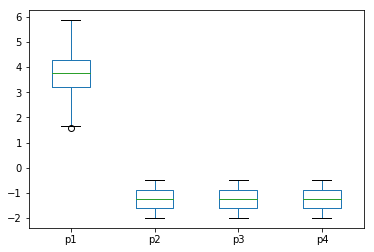

In [9]:
p1=df[0:10000][["p1"]]
p2=df[0:10000][["p2"]]
p3=df[0:10000][["p3"]]
p4=df[0:10000][["p4"]]
pdf=pd.concat([p1,p2,p3,p4],axis=1) #合并数据框
df[["p1","p2","p3","p4"]].plot(kind="box") #画出它们的箱线图
plt.show()

In [10]:
pdf.corr() #查看它们之间的相关系数

,p1,p2,p3,p4
p1,1.000000,-0.573157,-0.584554,-0.579239
p2,-0.573157,1.000000,0.002388,-0.006844
p3,-0.584554,0.002388,1.000000,0.012953
p4,-0.579239,-0.006844,0.012953,1.000000


In [11]:
print('未去重: ', df.shape)
print('去重: ', df.drop_duplicates().shape)

未去重:  (10000, 14)
去重:  (10000, 14)


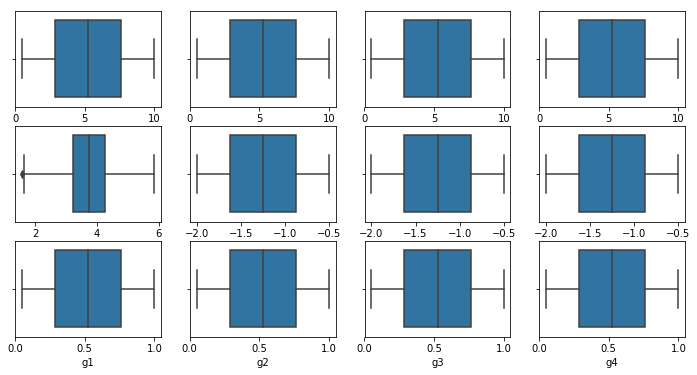

In [12]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 6))
#绘制箱线图
sns.boxplot(x="tau1", data=df,ax=axes[0][0])
sns.boxplot(x='tau2', data=df, ax=axes[0][1])
sns.boxplot(x='tau3', data=df, ax=axes[0][2])
sns.boxplot(x='tau4', data=df, ax=axes[0][3])
sns.boxplot(x="p1", data=df,ax=axes[1][0])
sns.boxplot(x='p2', data=df, ax=axes[1][1])
sns.boxplot(x='p3', data=df, ax=axes[1][2])
sns.boxplot(x='p4', data=df, ax=axes[1][3])
sns.boxplot(x="g1", data=df,ax=axes[2][0])
sns.boxplot(x='g2', data=df, ax=axes[2][1])
sns.boxplot(x='g3', data=df, ax=axes[2][2])
sns.boxplot(x='g4', data=df, ax=axes[2][3])
plt.show()

In [15]:
#由于p1等于p2、p3和p4的和的绝对值，故剔除p1
df.drop("p1",axis=1,inplace=True)

In [5]:
# 1:unstable  0:stable
df=pd.read_csv("D:\python3.7\HEHE\data.csv",engine="python")
left=LabelEncoder().fit_transform(df["stabf"]).reshape(-1,1) #标签化编码
df["result"]=left
features=df[0:10000][["tau1","tau2","tau3","tau4","p2","p3","p4","g1","g2","g3","g4"]]
label=df[0:10000][["result"]]

In [19]:
X_train,X_test,Y_train,Y_test=train_test_split(features.values,label.values)#划分数据集，为了数据的准确度，可以不用再划分了，直接导入就行

In [6]:
#导入已经划分好的数据集
train=pd.read_csv("D:/python3.7/HEHE/train.csv",engine="python")
test=pd.read_csv("D:/python3.7/HEHE/test.csv",engine="python")
X_train=train[0:7500][["tau1","tau2","tau3","tau4","p2","p3","p4","g1","g2","g3","g4"]]
Y_train=train[0:7500][["stabf"]]
X_test=test[0:2500][["tau1","tau2","tau3","tau4","p2","p3","p4","g1","g2","g3","g4"]]
Y_test=test[0:2500][["stabf"]]
#test.drop("Y_pred",axis=1,inplace=True) #可以把GBDT模型预测的结果删除

In [5]:
#逻辑回归模型
lj=LogisticRegression(penalty="l2").fit(X_train,Y_train)
Y_pred=lj.predict(X_test)  # 0.8228
print("正确率ACC:",accuracy_score(Y_test,Y_pred))
print("召回率REC:",recall_score(Y_test,Y_pred,average='micro'))
print("查准率F-score:",f1_score(Y_test,Y_pred,average='micro'))

D:\Users\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


正确率ACC: 0.8228
召回率REC: 0.8228
查准率F-score: 0.8228


In [20]:
#KNN邻近模型
knn=KNeighborsClassifier(n_neighbors=3).fit(X_train,Y_train)
Y_pred=knn.predict(X_test)  # 0.786
print("正确率ACC:",accuracy_score(Y_test,Y_pred))
print("召回率REC:",recall_score(Y_test,Y_pred,average='micro'))
print("查准率F-score:",f1_score(Y_test,Y_pred,average='micro'))

正确率ACC: 0.786
召回率REC: 0.786
查准率F-score: 0.786


D:\Users\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [21]:
#MLP神经网络模型
MLP=MLPClassifier().fit(X_train,Y_train)
Y_pred=MLP.predict(X_test)  # 0.9388(每次运行都会不一样)
print("正确率ACC:",accuracy_score(Y_test,Y_pred))
print("召回率REC:",recall_score(Y_test,Y_pred,average='micro'))
print("查准率F-score:",f1_score(Y_test,Y_pred,average='micro'))

D:\Users\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


正确率ACC: 0.9424
召回率REC: 0.9424
查准率F-score: 0.9424


In [23]:
#随机森林模型
forest=RandomForestClassifier(n_estimators=8).fit(X_train,Y_train)
Y_pred=forest.predict(X_test)  # 0.8932(每次运行也不一样)
print("正确率ACC:",accuracy_score(Y_test,Y_pred))
print("召回率REC:",recall_score(Y_test,Y_pred,average='micro'))
print("查准率F-score:",f1_score(Y_test,Y_pred,average='micro'))

D:\Users\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


正确率ACC: 0.894
召回率REC: 0.894
查准率F-score: 0.894


In [ ]:
GBDT=GradientBoostingClassifier(n_estimators=200).fit(X_train,Y_train)
Y_pred=GBDT.predict(X_test)  # 0.9408
print("正确率ACC:",accuracy_score(Y_test,Y_pred))
print("召回率REC:",recall_score(Y_test,Y_pred,average='micro'))
print("查准率F-score:",f1_score(Y_test,Y_pred,average='micro'))

In [7]:
#GBDT迭代决策树模型
GBDT=GradientBoostingClassifier(n_estimators=200).fit(X_train,Y_train)
Y_pred=GBDT.predict(X_test)  # 0.9408
print("正确率ACC:",accuracy_score(Y_test,Y_pred))
print("召回率REC:",recall_score(Y_test,Y_pred,average='micro'))
print("查准率F-score:",f1_score(Y_test,Y_pred,average='micro'))

D:\Users\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


正确率ACC: 0.9408
召回率REC: 0.9408
查准率F-score: 0.9408


In [9]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred))

             precision    recall  f1-score   support

          0       0.94      0.89      0.91       895
          1       0.94      0.97      0.95      1605

avg / total       0.94      0.94      0.94      2500



In [25]:
#保存模型
joblib.dump(GBDT,"D:\python3.7\HEHE\GBDT")

['D:\\python3.7\\HEHE\\GBDT']

In [46]:
#保存划分的数据集
df_train=pd.DataFrame(X_train)
df_train.columns=list(features.columns)
df_train["stabf"]=Y_train
df_train.to_csv("D:/python3.7/HEHE/train.csv",index=False)

df_test=pd.DataFrame(X_test)
df_test.columns=list(features.columns)
df_test["stabf"]=Y_test
df_test["Y_pred"]=Y_pred
df_test.to_csv("D:/python3.7/HEHE/test.csv",index=False)

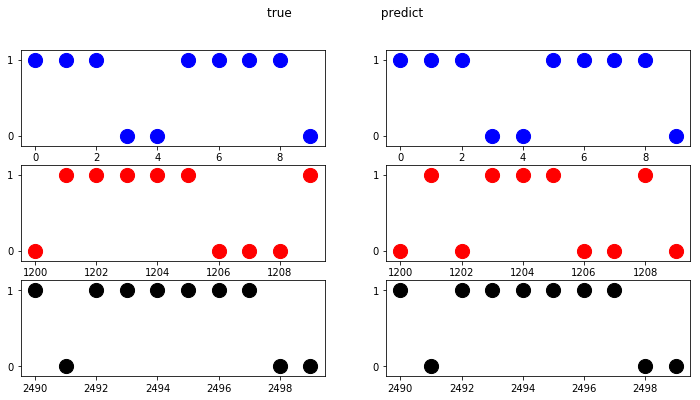

In [5]:
#真实值与预测值的对比
true_stabf=test[0:2500][["stabf"]]
predict_stabf=test[0:2500][["Y_pred"]]
fig,axes = plt.subplots(3,2,figsize=(12,6))
fig.suptitle("true                       predict") #为图设置标题
x=np.arange(0,10,1)  #第一段
y=np.arange(1200,1210,1)  #第二段
z=np.arange(2490,2500,1)  #第三段
axes[0,0].scatter(x,true_stabf[0:10][["stabf"]],s=200,c="blue")
axes[0,1].scatter(x,predict_stabf[0:10][["Y_pred"]],s=200,c="blue")
axes[1,0].scatter(y,true_stabf[1200:1210][["stabf"]],s=200,c="red")
axes[1,1].scatter(y,predict_stabf[1200:1210][["Y_pred"]],s=200,c="red")
axes[2,0].scatter(z,true_stabf[2490:2500][["stabf"]],s=200,c="black")
axes[2,1].scatter(z,predict_stabf[2490:2500][["Y_pred"]],s=200,c="black")
plt.show()

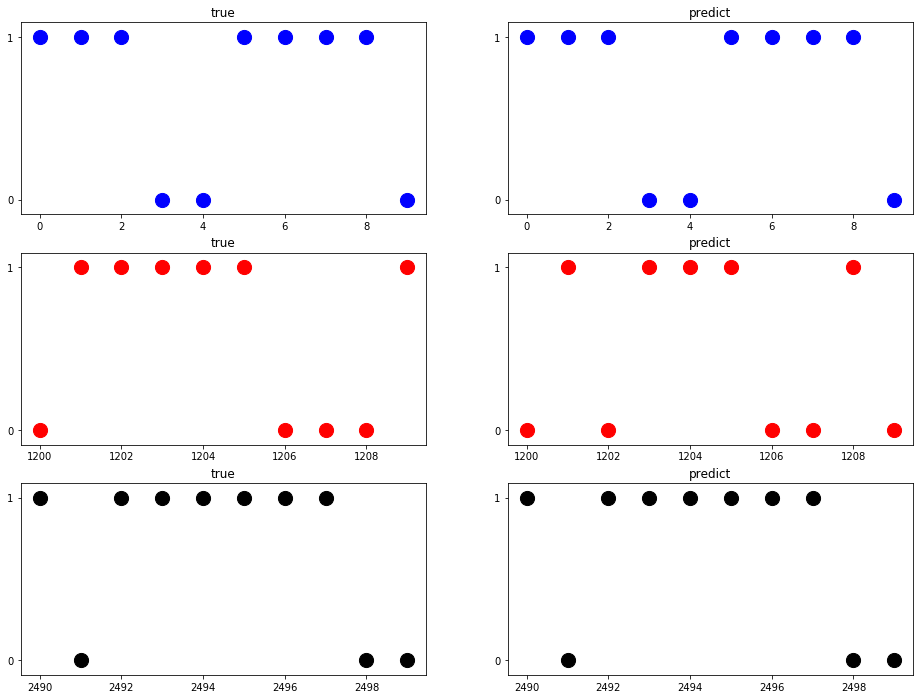

In [21]:
% matplotlib inline
a=[(1,"true",x,true_stabf[0:10][["stabf"]],"blue"),(2,"predict",x,predict_stabf[0:10][["Y_pred"]],"blue"),
   (3,"true",y,true_stabf[1200:1210][["stabf"]],"red"),(4,"predict",y,predict_stabf[1200:1210][["Y_pred"]],"red"),
   (5,"true",z,true_stabf[2490:2500][["stabf"]],"black"),(6,"predict",z,predict_stabf[2490:2500][["Y_pred"]],"black")]
plt.figure(figsize=(16,12))
for i,j,k,l,m in a:
    plt.subplot(3,2,i)
    plt.scatter(k,l,s=200,c=m)
    plt.title(j)

In [33]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train,Y_train)
svm.score(X_test,Y_test)

D:\Users\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.90480000000000005

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
pipe=Pipeline(steps=[("scaler",MinMaxScaler()),("svm",SVC())])
pipe.fit(X_train,Y_train)
pipe.score(X_test,Y_test)

D:\Users\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.86799999999999999

In [13]:
lj=LogisticRegression(penalty="l2")
knn=KNeighborsClassifier(n_neighbors=3)
MLP=MLPClassifier()
forest=RandomForestClassifier(n_estimators=8)
GBDT=GradientBoostingClassifier(n_estimators=200)
from sklearn.ensemble import VotingClassifier
vote=VotingClassifier(estimators=[("lr",lj),("knn",knn),("mlp",MLP),("rfc",forest),("gbdt",GBDT)],voting="hard")

In [14]:
#vote.fit(X_train,Y_train)
#vote.score(Y_test,Y_test)
for clf in (lj,knn,MLP,forest,GBDT,vote):
    clf.fit(X_train,Y_train)
    Y_pred=clf.predict(X_test)
    print(clf.__class__.__name__,accuracy_score(Y_test,Y_pred))

D:\Users\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
D:\Users\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression 0.8228
KNeighborsClassifier 0.786
MLPClassifier 0.9512


D:\Users\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier 0.894


D:\Users\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier 0.9408


D:\Users\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingClassifier 0.9332


In [ ]:
import pandas_profiling
import sys
#sys.path.append("D:\python3.7")
#sys.path.append("D:\python3.7\Lib\site-packages")
#haha=pandas_profiling.ProfileReport(df)
#haha.to_file(outputfile="baogao.html")
pandas_profiling.ProfileReport(df)